In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)
plt.rcParams['font.size'] = 10

In [2]:
X_train = pd.read_parquet("X_train.parquet")
X_val = pd.read_parquet("X_val.parquet")
X_test = pd.read_parquet("X_test.parquet")

In [3]:
train_target = pd.read_parquet("train_target.parquet")
test_target = pd.read_parquet("test_target.parquet")
val_target = pd.read_parquet("val_target.parquet")

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
model = RandomForestClassifier(n_jobs=-1, random_state=30)

In [7]:
model.fit(X_train, train_target.values.ravel())

RandomForestClassifier(n_jobs=-1, random_state=30)

In [8]:
model.score(X_train, train_target)

0.9865269461077845

In [9]:
model.score(X_val, val_target)

0.8071748878923767

In [10]:
model.score(X_test, test_target)

0.8708133971291866

In [23]:
def test_params(**params):
    model = RandomForestClassifier(random_state=40, n_jobs=-1, **params)
    model.fit(X_train, train_target.values.ravel())
    train_accuracy = model.score(X_train, train_target.values.ravel())
    val_accuracy = model.score(X_val, val_target.values.ravel())
    test_accuracy = model.score(X_test, test_target.values.ravel())
    return {"val_": val_accuracy, "test_": test_accuracy, "train_": train_accuracy,}

In [15]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',


In [20]:
len(model.estimators_)

100

In [35]:
max_estimators = pd.DataFrame([test_params(n_estimators=i) for i in list(range(100, 1000, 10))])

In [36]:
max_estimators['Max_estimator'] = list(range(100,1000,10))

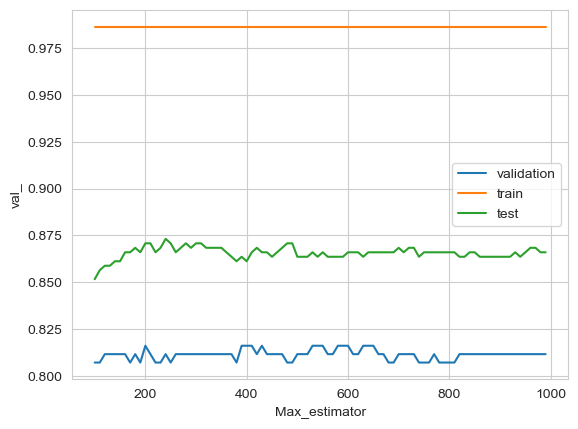

In [37]:
fig, ax = plt.subplots()

sns.lineplot(data=max_estimators, x='Max_estimator', y='val_', label='validation')
sns.lineplot(data=max_estimators, x='Max_estimator', y='train_', label='train')
sns.lineplot(data=max_estimators, x='Max_estimator', y='test_', label='test')
plt.legend()

In [48]:
test_params(n_estimators=400)

{'val_': 0.8161434977578476,
 'test_': 0.861244019138756,
 'train_': 0.9865269461077845}

In [42]:
test_params(n_estimators=200)

{'val_': 0.8161434977578476,
 'test_': 0.8708133971291866,
 'train_': 0.9865269461077845}

In [62]:
test_params(n_estimators=200)

{'val_': 0.8161434977578476,
 'test_': 0.8660287081339713,
 'train_': 0.9865269461077845}

In [65]:
test_params(n_estimators=200)

{'val_': 0.8071748878923767,
 'test_': 0.8516746411483254,
 'train_': 0.9865269461077845}

In [94]:
max_estimators = pd.DataFrame([test_params(min_samples_split=i) for i in list(range(1, 200))])

In [95]:
max_estimators['Max_estimator'] = list(range(1, 200))

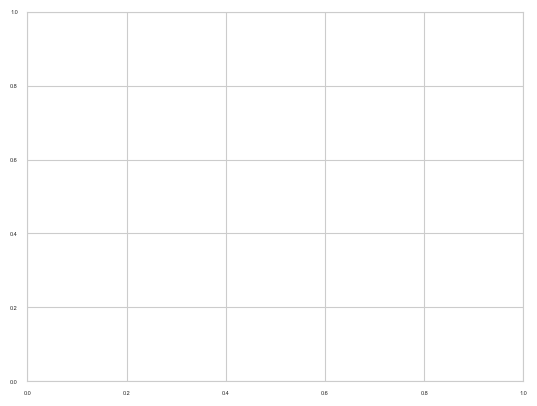

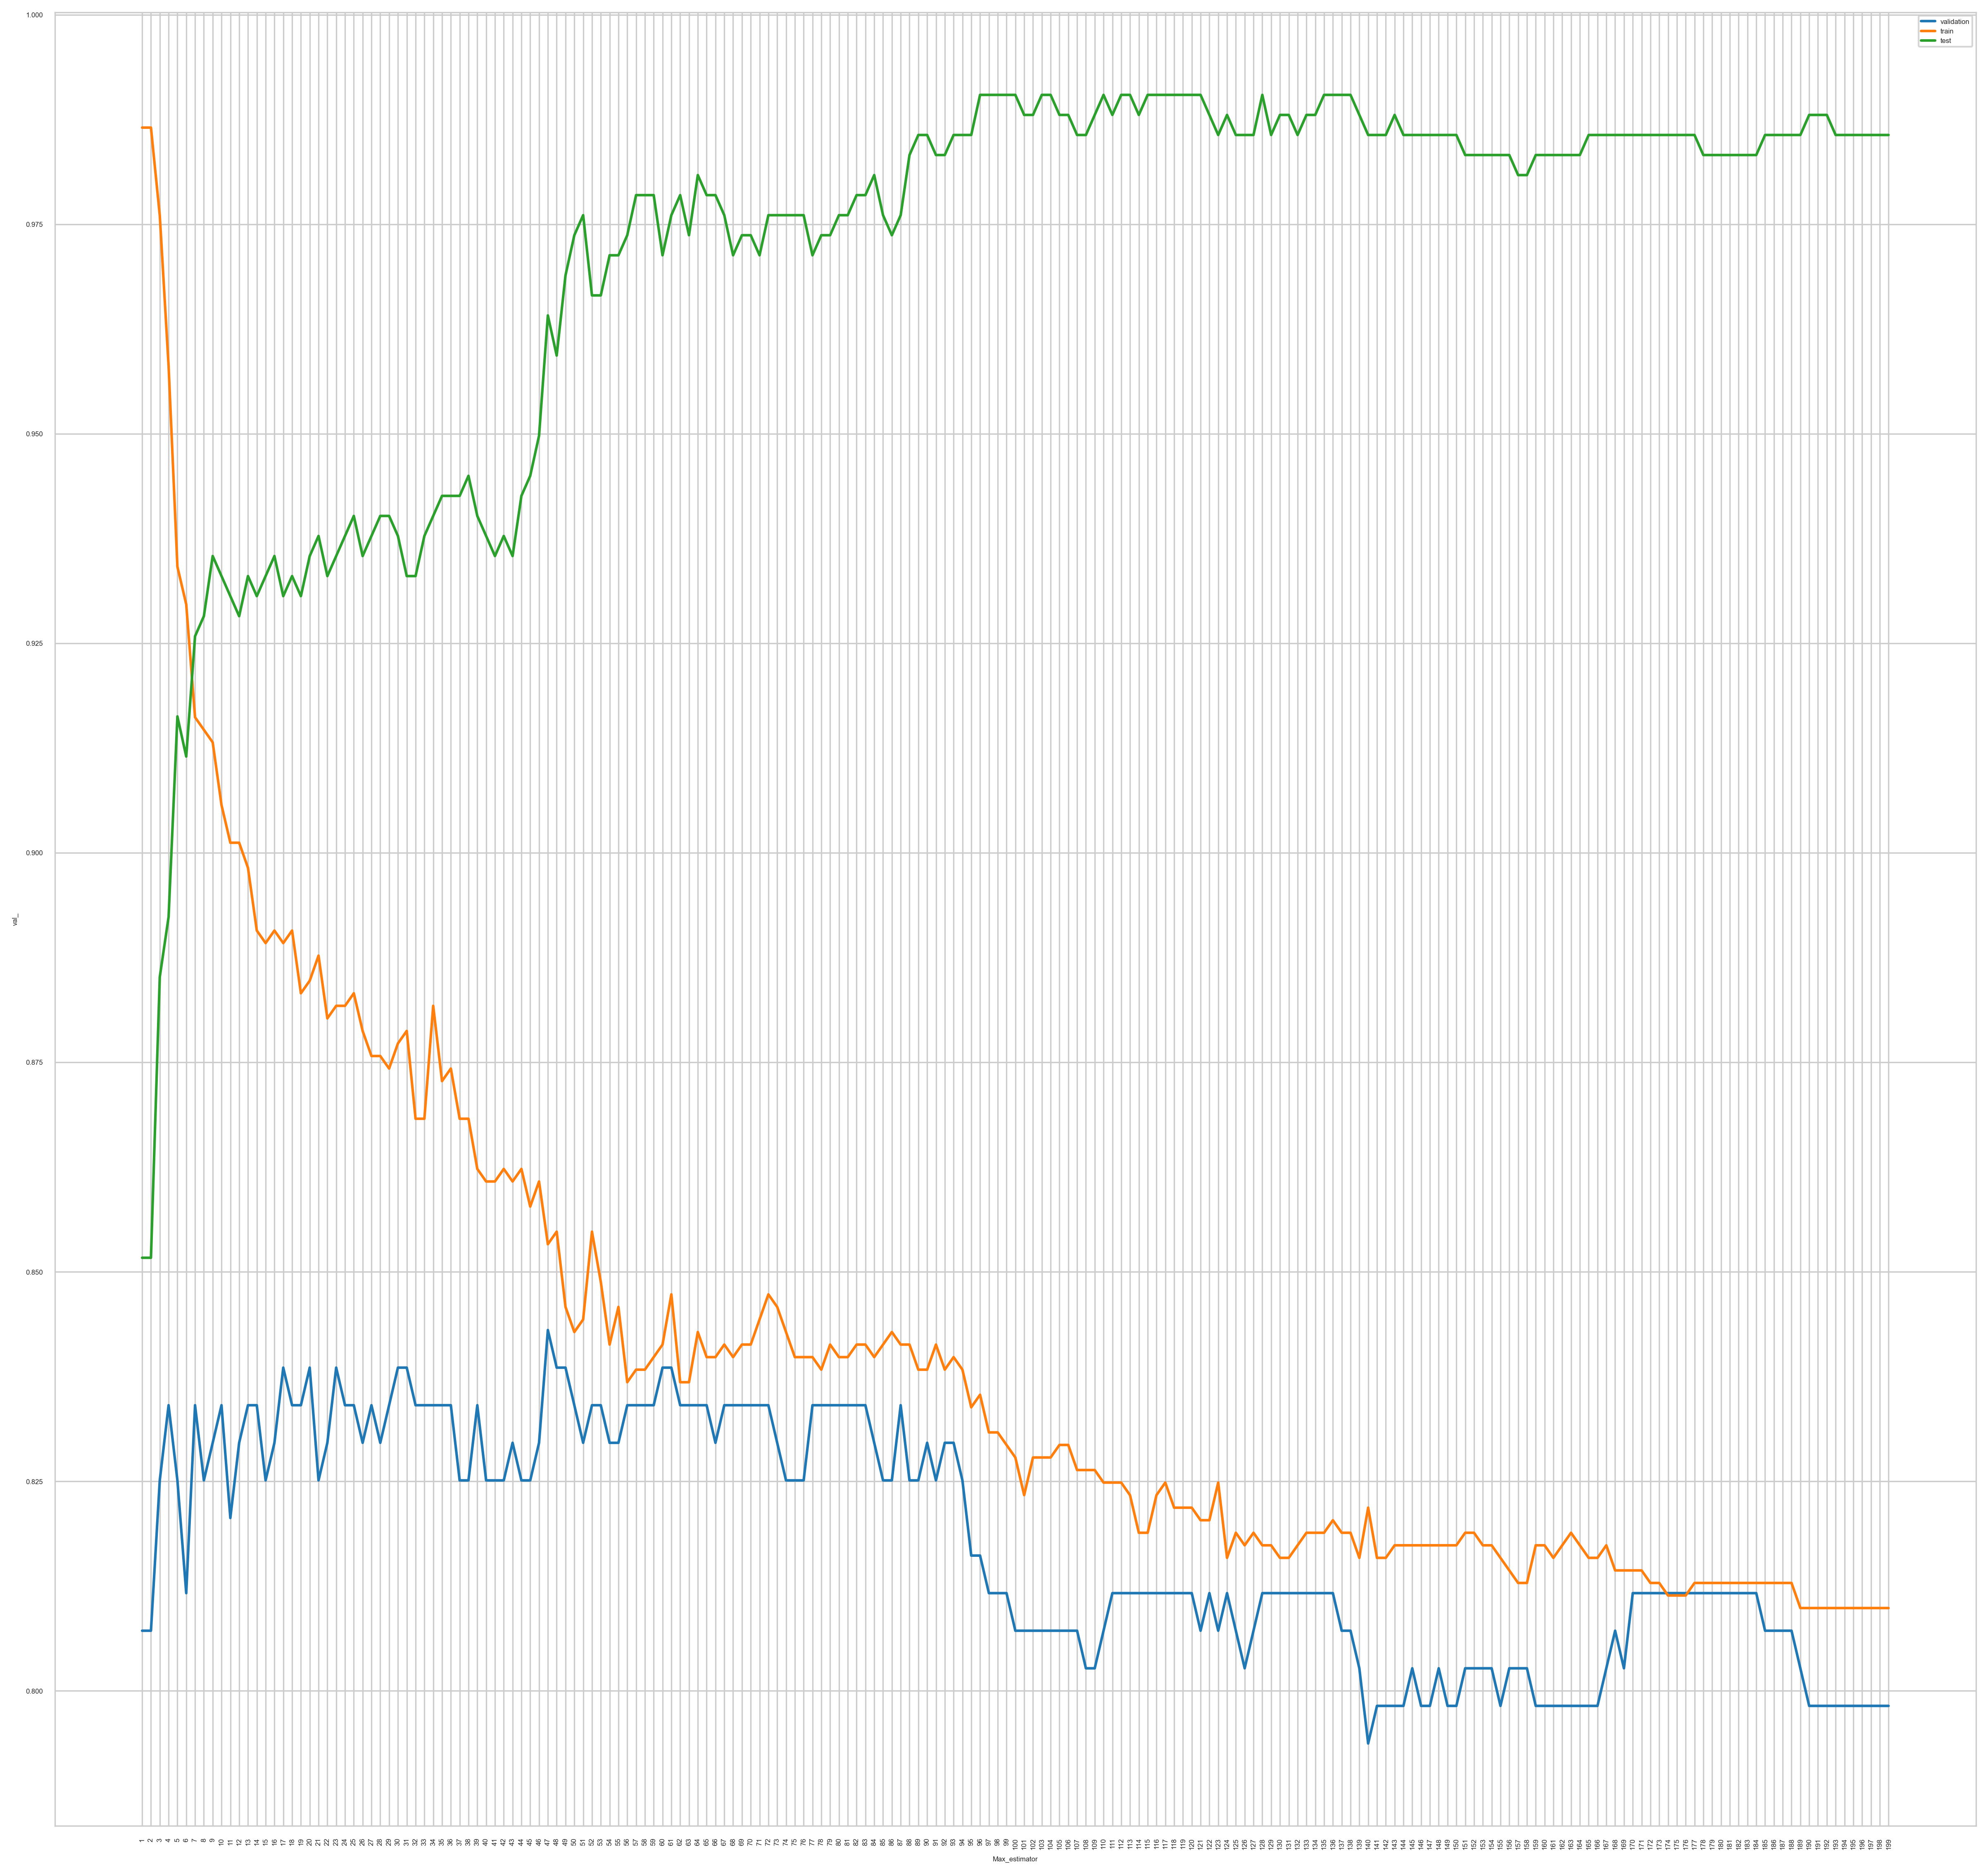

In [109]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 19), dpi=300)
sns.lineplot(data=max_estimators, x='Max_estimator', y='val_', label='validation')
sns.lineplot(data=max_estimators, x='Max_estimator', y='train_', label='train')
sns.lineplot(data=max_estimators, x='Max_estimator', y='test_', label='test')
plt.xticks(list(range(1, 200)), rotation=90)
plt.legend()

In [97]:
test_params(n_estimators=200, min_samples_split=10)

{'val_': 0.8251121076233184,
 'test_': 0.9330143540669856,
 'train_': 0.907185628742515}

In [107]:
test_params(n_estimators=200, min_samples_split=9)

{'val_': 0.8295964125560538,
 'test_': 0.9186602870813397,
 'train_': 0.9086826347305389}

In [119]:
test_params(n_estimators=200, min_samples_split=9,min_impurity_decrease=1e-4)

{'val_': 0.8340807174887892,
 'test_': 0.9282296650717703,
 'train_': 0.8907185628742516}

In [151]:
min_sample_leaf = pd.DataFrame([test_params(n_estimators=200, min_samples_split=9,min_impurity_decrease=1e-4, min_samples_leaf=i) for i in list(range(1, 30))])

In [152]:
min_sample_leaf['min_leaf'] = list(range(1, 30))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


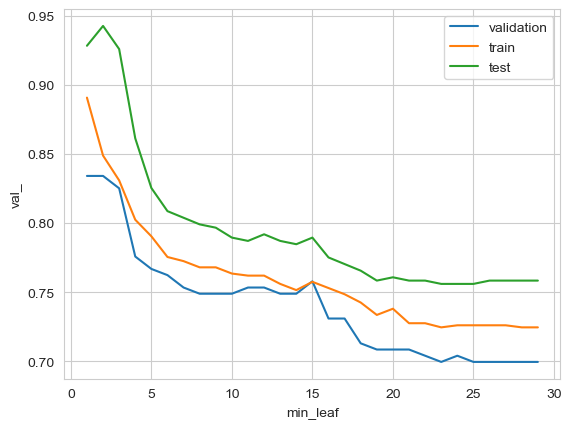

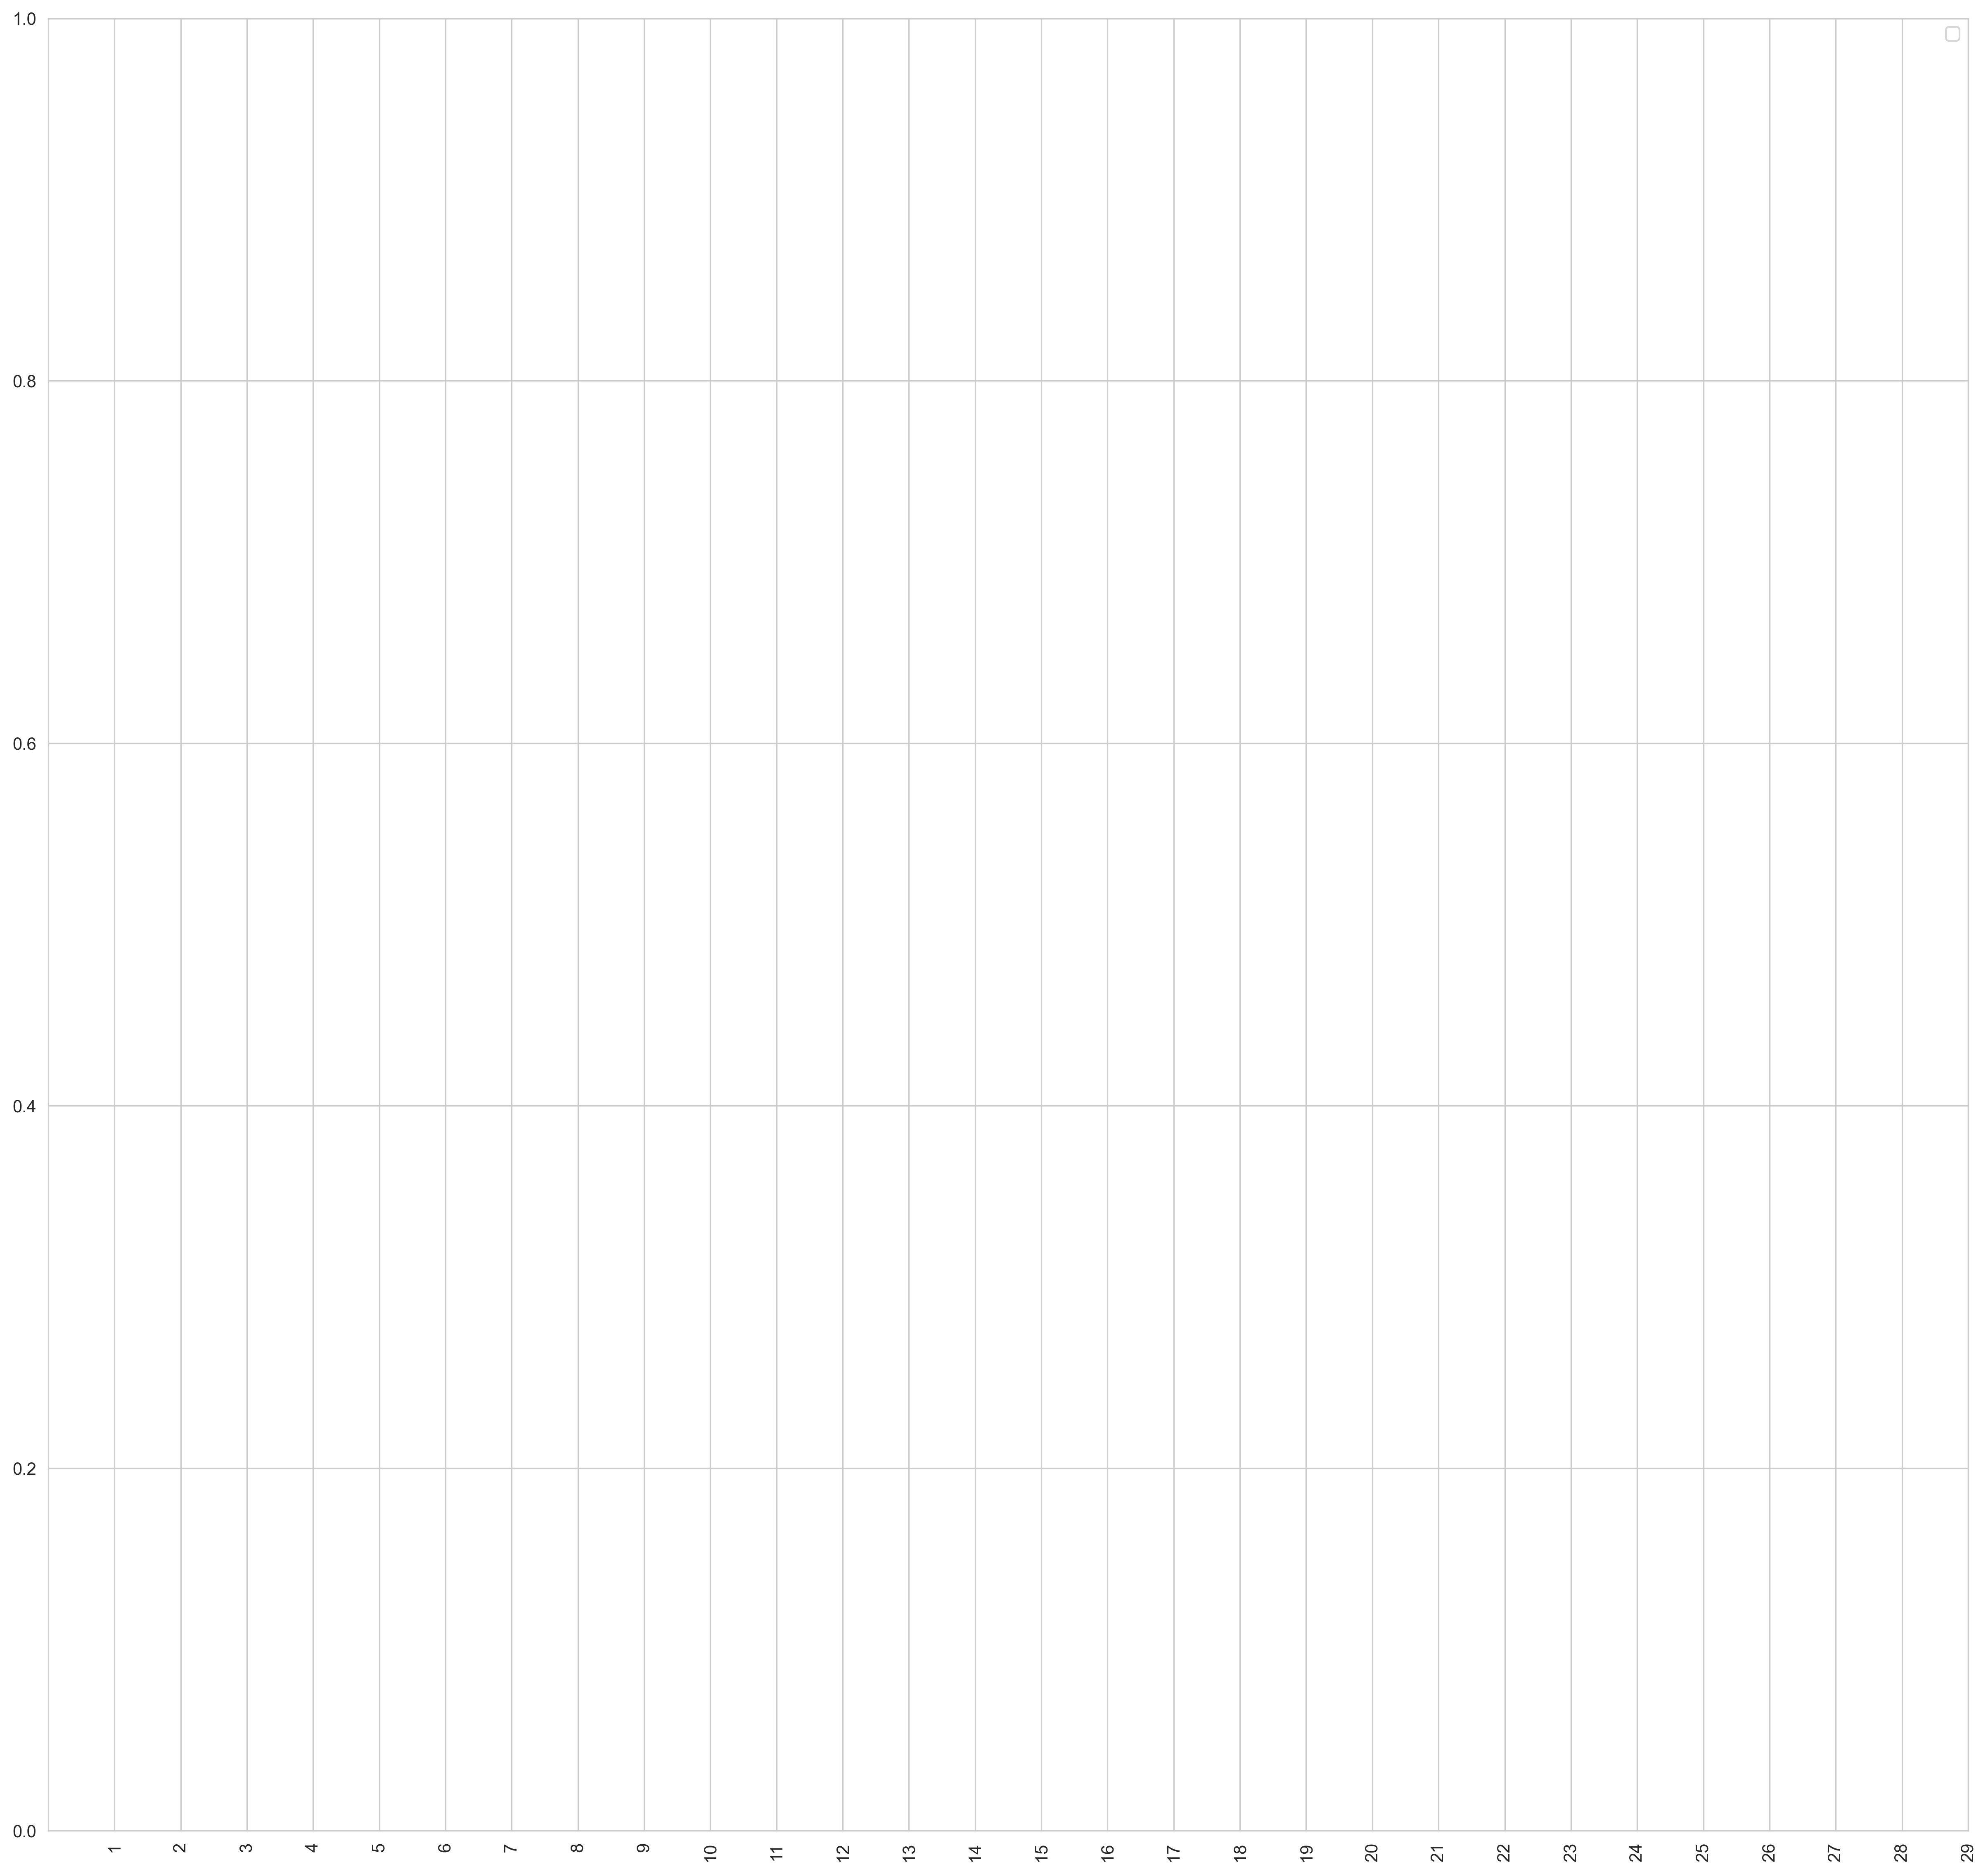

In [199]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 19), dpi=300)
sns.lineplot(data=min_sample_leaf, ax=ax, x='min_leaf', y='val_', label='validation')
sns.lineplot(data=min_sample_leaf, ax=ax, x='min_leaf', y='train_', label='train')
sns.lineplot(data=min_sample_leaf, ax=ax, x='min_leaf', y='test_', label='test')
plt.xticks(list(range(1, 30)), rotation=90)
plt.legend()
plt.show()

In [154]:
test_params(n_estimators=200, min_samples_split=9,min_impurity_decrease=1e-4, min_samples_leaf=2, class_weight='balanced')

{'val_': 0.8340807174887892,
 'test_': 0.9425837320574163,
 'train_': 0.8488023952095808}

In [203]:
test_params(n_estimators=200, min_samples_split=9,min_impurity_decrease=1e-4, min_samples_leaf=2)

{'val_': 0.8340807174887892,
 'test_': 0.9425837320574163,
 'train_': 0.8488023952095808}

In [156]:
model = RandomForestClassifier(random_state=40, n_jobs=-1, n_estimators=200, min_samples_split=9,min_impurity_decrease=1e-4, min_samples_leaf=2)
model.fit(X_train, train_target.values.ravel())

RandomForestClassifier(min_impurity_decrease=0.0001, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=200, n_jobs=-1,
                       random_state=40)

In [157]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix,PredictionErrorDisplay
accuracy_score(train_target, train_pred)

0.8488023952095808

In [161]:
accuracy_score(val_target, val_pred)

0.8340807174887892

In [160]:
accuracy_score(test_target, test_pred)

0.9425837320574163

<Axes: >

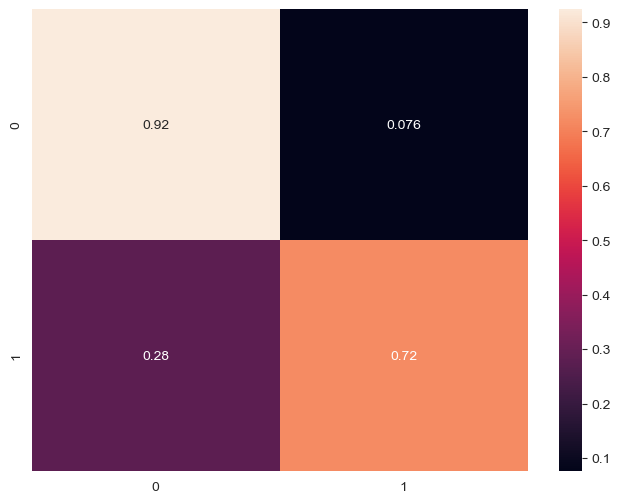

In [168]:
cf = confusion_matrix(train_target, train_pred, normalize='true')
plt.figure(figsize=(8, 6), dpi=100)
plt.rcParams['font.size'] = 10
sns.heatmap(cf, annot=True)

<Axes: >

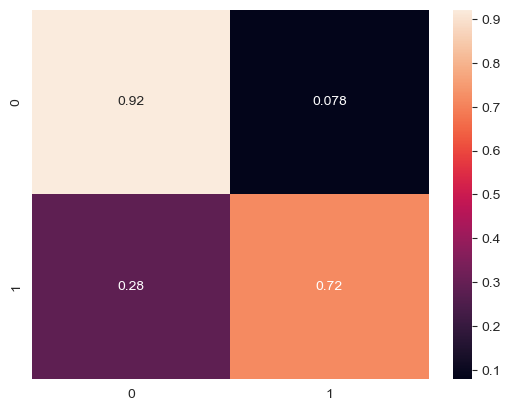

In [169]:
cf = confusion_matrix(val_target, val_pred, normalize='true')
sns.heatmap(cf, annot=True)

<Axes: >

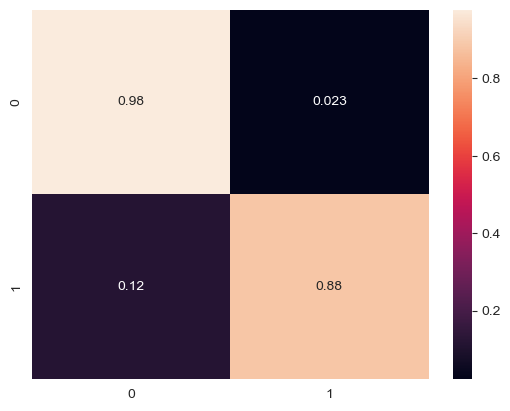

In [170]:
cf = confusion_matrix(test_target, test_pred, normalize='true')
sns.heatmap(cf, annot=True)

In [186]:
import sklearn.metrics as metrics
metrics.log_loss(train_target, train_pred)

5.449714060330587

In [188]:
metrics.log_loss(val_target, val_pred)

5.980337109405088

In [187]:
metrics.log_loss(test_target, test_pred)

2.069492060619167

In [189]:
import joblib

In [ ]:
joblib.dump({
    
})